In [40]:
import netCDF4
#import xarray as xr
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

161 41
a3 shape is : (41, 161)


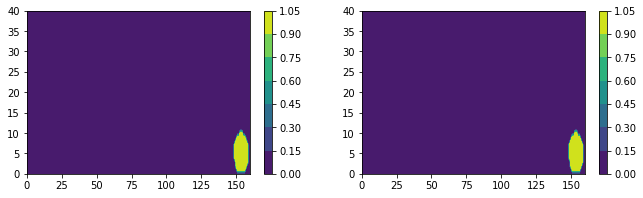

In [41]:
f1 = netCDF4.Dataset('/N/slate/ckieu/tmp/output/ncep_extracted_41x161_12h/train/seg/seg_20140521_18_00.nc')
msk = f1.variables['mask']
nx = f1.dimensions['lon'].size
ny = f1.dimensions['lat'].size
print(nx,ny)
a2 = np.zeros((nx,ny))
a2 = msk[:,:]
a3 = cv2.resize(a2, (161, 41)) 
print('a3 shape is :',a3.shape)

plt.figure(figsize=(11, 3))
plt.subplot(1,2,1)
plt.contourf(a2)
plt.colorbar()
plt.subplot(1,2,2)
plt.contourf(a3)
plt.colorbar()
plt.show()
f1.close()

In [42]:
#
# define data source and reading pos/neg data 
#
IMG_SIZE_X = 128
IMG_SIZE_Y = 64
rootdir="/N/slate/ckieu/tmp/output/ncep_extracted_41x161_12h/train/"
tcg_class = ['seg','pos']
array_input = []
array_target = []
for tcg in tcg_class:    
    datadir=rootdir + tcg + '/'
    print('Input data dir is: ',datadir)
    if tcg == "pos":
        for img in tqdm(os.listdir(datadir)):
            try:
                print('Processing file:', img)           
                file=datadir+'/'+img
                f = netCDF4.Dataset(file)
                abv = f.variables['absvprs']
                nx = np.size(abv[0,0,:])
                ny = np.size(abv[0,:,0])
                nz = np.size(abv[:,0,0])
                print('nx = ',nx,' ny = ',ny )             
                a2 = np.zeros((nx,ny,12))         
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,0] = abv[1,j,i]    # abs vort at 950 mb
                rel = f.variables['rhprs'] 
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,1] = rel[7,j,i]    # RH at 750 mb 
                sfc = f.variables['pressfc']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,2] = sfc[j,i]      # surface pressure
                tmp = f.variables['tmpprs']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,3] = tmp[15,j,i]   # temperature at 400 mb
                tsf = f.variables['tmpsfc']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,4] = tsf[j,i]      # surface temperature
                ugr = f.variables['ugrdprs']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,5] = ugr[3,j,i]    # u-wind at 900 mb
                        a2[i,j,6] = ugr[17,j,i]   # u-wind at 300 mb
                vgr = f.variables['vgrdprs']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,7] = vgr[3,j,i]    # v-wind at 900 mb
                        a2[i,j,8] = vgr[17,j,i]   # v-wind at 300 mb
                hgt = f.variables['hgtprs']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,9] = hgt[3,j,i]    # geopotential at 850 mb
                wgr = f.variables['vvelprs']
                for i in range(a2.shape[0]):
                    for j in range(a2.shape[1]):
                        a2[i,j,10] = wgr[3,j,i]   # w-wind at 900 mb
                        a2[i,j,11] = wgr[17,j,i]  # w-wind at 300 mb
                a3 = cv2.resize(a2, (IMG_SIZE_X, IMG_SIZE_Y)) 
                print('a3 shape is :',a3.shape)
                #input('Enter to continue...')
                array_input.append(a3)
            except Exception as e:
                pass
    else:
        for img in tqdm(os.listdir(datadir)):
            try:
                print('Processing file:', img)           
                file=datadir+'/'+img
                f = netCDF4.Dataset(file)                
                nx = f.dimensions['lon'].size
                ny = f.dimensions['lat'].size             
                print('nx = ',nx,' ny = ',ny )             
                a2 = np.zeros((nx,ny))         
                segment = f.variables['mask']
                a2 = segment[:,:] 
                a3 = cv2.resize(a2, (IMG_SIZE_X, IMG_SIZE_Y)) 
                print('a3 shape is :',a3.shape)
                #input('Enter to continue...')
                array_target.append(a3)
            except Exception as e:
                pass            

Input data dir is:  /N/slate/ckieu/tmp/output/ncep_extracted_41x161_12h/train/seg/


  0%|                                                                                                                                                                 | 0/292 [00:00<?, ?it/s]

Processing file: seg_20140715_18_00.nc
nx =  161  ny =  41


  2%|██▌                                                                                                                                                      | 5/292 [00:00<00:18, 15.21it/s]

a3 shape is : (64, 128)
Processing file: seg_20121006_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100912_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080930_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120922_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130930_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110710_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20101031_06_00.nc


  4%|██████▏                                                                                                                                                 | 12/292 [00:00<00:11, 24.61it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091120_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120710_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120915_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140608_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20121004_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151011_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150904_00_00.nc


  7%|██████████▍                                                                                                                                             | 20/292 [00:00<00:09, 28.62it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080908_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120530_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110530_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140904_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150731_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110830_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100827_06_00.nc


 10%|███████████████                                                                                                                                         | 29/292 [00:01<00:07, 33.82it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140708_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080907_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110723_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20141029_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140612_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20101110_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140905_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080912_06_00.nc


 13%|███████████████████▎                                                                                                                                    | 37/292 [00:01<00:07, 35.16it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130904_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091008_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110901_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130628_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110820_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150813_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080815_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131018_12_00.nc


 14%|█████████████████████▎                                                                                                                                  | 41/292 [00:01<00:09, 26.61it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140927_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090928_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090807_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090731_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131015_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100709_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120929_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120921_12_00.nc


 16%|████████████████████████▍                                                                                                                               | 47/292 [00:01<00:07, 31.82it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120513_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090708_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110519_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130815_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140909_00_00.nc


 19%|█████████████████████████████▏                                                                                                                          | 56/292 [00:02<00:07, 31.04it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110923_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130804_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150712_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120726_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130915_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080813_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151019_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080901_18_00.nc


 22%|█████████████████████████████████▎                                                                                                                      | 64/292 [00:02<00:07, 31.37it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130705_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080804_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150707_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150702_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080525_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150818_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150501_18_00.nc


 25%|█████████████████████████████████████▍                                                                                                                  | 72/292 [00:02<00:06, 33.29it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080809_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150531_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150912_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20101019_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140816_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090822_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150721_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150813_12_00.nc


 28%|██████████████████████████████████████████▏                                                                                                             | 81/292 [00:02<00:05, 36.43it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100919_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130811_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130928_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151008_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080513_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140909_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20111008_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081105_00_00.nc


 29%|████████████████████████████████████████████▏                                                                                                           | 85/292 [00:02<00:06, 30.20it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20141010_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120802_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080823_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080927_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150722_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090825_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131016_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20111004_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130925_06_00.nc


 33%|█████████████████████████████████████████████████▍                                                                                                      | 95/292 [00:03<00:05, 33.24it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120927_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080812_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080810_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140727_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090802_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140902_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100828_12_00.nc


 35%|█████████████████████████████████████████████████████▎                                                                                                 | 103/292 [00:03<00:06, 30.58it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140722_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150922_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081017_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131008_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090820_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)


 37%|███████████████████████████████████████████████████████▎                                                                                               | 107/292 [00:03<00:05, 30.85it/s]

Processing file: seg_20110615_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130807_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091031_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130724_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140521_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150913_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20101019_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100830_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140910_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080701_06_00.nc


 40%|████████████████████████████████████████████████████████████▌                                                                                          | 117/292 [00:03<00:04, 35.39it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100920_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120928_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130819_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110505_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131012_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091017_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131101_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20111005_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120911_06_00.nc


 44%|██████████████████████████████████████████████████████████████████▏                                                                                    | 128/292 [00:04<00:03, 43.89it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150831_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090710_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120713_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090808_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091123_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150823_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150708_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081102_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130913_00_00.nc


 47%|██████████████████████████████████████████████████████████████████████▊                                                                                | 137/292 [00:04<00:07, 21.91it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131006_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110909_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20111106_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110726_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110905_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090714_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130916_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090925_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130816_00_00.nc


 49%|█████████████████████████████████████████████████████████████████████████▍                                                                             | 142/292 [00:04<00:05, 25.11it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090924_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151117_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091015_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140628_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120801_00_00.nc


 50%|███████████████████████████████████████████████████████████████████████████▌                                                                           | 146/292 [00:05<00:06, 23.76it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091013_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150701_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20121012_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090502_06_00.nc


 53%|███████████████████████████████████████████████████████████████████████████████▋                                                                       | 154/292 [00:05<00:06, 22.16it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091007_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091119_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150527_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150926_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080806_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130814_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080824_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090707_12_00.nc


 55%|██████████████████████████████████████████████████████████████████████████████████▋                                                                    | 160/292 [00:05<00:07, 18.75it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100905_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131031_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080723_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090910_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090902_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140702_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090612_18_00.nc


 58%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                | 168/292 [00:06<00:04, 25.56it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120624_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140727_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100819_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130615_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110922_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120816_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110808_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150729_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130824_12_00.nc


 61%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 177/292 [00:06<00:04, 27.49it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081110_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081011_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080506_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090926_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120718_00_00.nc


 64%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 186/292 [00:06<00:03, 32.43it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20121021_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120918_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130830_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150905_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151012_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140930_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090802_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150805_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080616_18_00.nc


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 191/292 [00:06<00:02, 35.75it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140923_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110607_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100713_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090703_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090615_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110823_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081022_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091025_06_00.nc


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 200/292 [00:06<00:02, 38.52it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150628_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140812_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150930_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090913_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140818_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20121029_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090712_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090920_06_00.nc


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 211/292 [00:07<00:02, 39.14it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110713_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20121013_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120609_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090826_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080721_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100716_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130606_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100902_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 216/292 [00:07<00:01, 38.68it/s]

Processing file: seg_20130828_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140916_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131013_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120805_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080917_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151001_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20141124_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090621_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090927_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131008_12_00.nc


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 226/292 [00:07<00:01, 39.23it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130808_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080513_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140730_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131027_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150916_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150706_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110620_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140923_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120519_18_00.nc


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 231/292 [00:07<00:01, 39.87it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130729_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120703_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100614_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20101011_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080627_06_00.nc


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 241/292 [00:08<00:01, 34.93it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150919_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080923_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100805_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150815_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130828_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100718_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20081114_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120909_12_00.nc


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 251/292 [00:08<00:01, 37.08it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090907_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130623_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080710_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090806_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140713_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131119_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120726_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110814_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120902_00_00.nc


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 260/292 [00:08<00:00, 39.19it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110802_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130829_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140801_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120818_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100820_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150816_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080803_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140705_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130626_12_00.nc


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 265/292 [00:08<00:00, 41.09it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120811_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20120615_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080906_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151014_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140629_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130918_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150825_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090728_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150920_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20140725_12_00.nc


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 276/292 [00:08<00:00, 39.96it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130728_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20091106_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20131111_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150727_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20080626_18_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130619_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110926_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20101004_00_00.nc


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 288/292 [00:09<00:00, 42.84it/s]

nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20141001_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20110913_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130801_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20121111_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150929_12_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130714_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090911_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20100826_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090902_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20150619_06_00.nc


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:09<00:00, 31.17it/s]


nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20090815_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20130911_06_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Processing file: seg_20151123_00_00.nc
nx =  161  ny =  41
a3 shape is : (64, 128)
Input data dir is:  /N/slate/ckieu/tmp/output/ncep_extracted_41x161_12h/train/pos/


  0%|                                                                                                                                                                 | 0/292 [00:00<?, ?it/s]

Processing file: fnl_20110823_06_00.nc
nx =  161  ny =  41


  0%|▌                                                                                                                                                      | 1/292 [00:13<1:06:12, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150805_12_00.nc
nx =  161  ny =  41


  1%|█                                                                                                                                                      | 2/292 [00:27<1:05:59, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110607_12_00.nc
nx =  161  ny =  41


  1%|█▌                                                                                                                                                     | 3/292 [00:41<1:06:03, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140816_12_00.nc
nx =  161  ny =  41


  1%|██                                                                                                                                                     | 4/292 [00:54<1:05:56, 13.74s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131013_00_00.nc
nx =  161  ny =  41


  2%|██▌                                                                                                                                                    | 5/292 [01:08<1:05:35, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080627_06_00.nc
nx =  161  ny =  41


  2%|███                                                                                                                                                    | 6/292 [01:22<1:05:25, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120802_18_00.nc
nx =  161  ny =  41


  2%|███▌                                                                                                                                                   | 7/292 [01:35<1:05:02, 13.69s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150825_00_00.nc
nx =  161  ny =  41


  3%|████▏                                                                                                                                                  | 8/292 [01:49<1:04:48, 13.69s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120609_12_00.nc
nx =  161  ny =  41


  3%|████▋                                                                                                                                                  | 9/292 [02:03<1:04:44, 13.73s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151019_06_00.nc
nx =  161  ny =  41


  3%|█████▏                                                                                                                                                | 10/292 [02:17<1:04:22, 13.70s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080901_18_00.nc
nx =  161  ny =  41


  4%|█████▋                                                                                                                                                | 11/292 [02:30<1:04:11, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100919_00_00.nc
nx =  161  ny =  41


  4%|██████▏                                                                                                                                               | 12/292 [02:44<1:04:09, 13.75s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150929_12_00.nc
nx =  161  ny =  41


  4%|██████▋                                                                                                                                               | 13/292 [02:58<1:03:57, 13.76s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140905_00_00.nc
nx =  161  ny =  41


  5%|███████▏                                                                                                                                              | 14/292 [03:12<1:03:41, 13.75s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151011_12_00.nc
nx =  161  ny =  41


  5%|███████▋                                                                                                                                              | 15/292 [03:25<1:03:27, 13.74s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150916_18_00.nc
nx =  161  ny =  41


  5%|████████▏                                                                                                                                             | 16/292 [03:39<1:03:09, 13.73s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080701_06_00.nc
nx =  161  ny =  41


  6%|████████▋                                                                                                                                             | 17/292 [03:53<1:02:55, 13.73s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140730_00_00.nc
nx =  161  ny =  41


  6%|█████████▏                                                                                                                                            | 18/292 [04:06<1:02:40, 13.73s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151012_12_00.nc
nx =  161  ny =  41


  7%|█████████▊                                                                                                                                            | 19/292 [04:20<1:02:22, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090806_06_00.nc
nx =  161  ny =  41


  7%|██████████▎                                                                                                                                           | 20/292 [04:34<1:02:11, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080907_00_00.nc
nx =  161  ny =  41


  7%|██████████▊                                                                                                                                           | 21/292 [04:47<1:01:40, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130804_12_00.nc
nx =  161  ny =  41


  8%|███████████▎                                                                                                                                          | 22/292 [05:01<1:01:20, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100826_06_00.nc
nx =  161  ny =  41


  8%|███████████▊                                                                                                                                          | 23/292 [05:15<1:01:02, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091025_06_00.nc
nx =  161  ny =  41


  8%|████████████▎                                                                                                                                         | 24/292 [05:28<1:00:53, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150702_06_00.nc
nx =  161  ny =  41


  9%|████████████▊                                                                                                                                         | 25/292 [05:42<1:00:37, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091031_00_00.nc
nx =  161  ny =  41


  9%|█████████████▎                                                                                                                                        | 26/292 [05:56<1:00:33, 13.66s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20141124_18_00.nc
nx =  161  ny =  41


  9%|█████████████▊                                                                                                                                        | 27/292 [06:09<1:00:30, 13.70s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120902_00_00.nc
nx =  161  ny =  41


 10%|██████████████▍                                                                                                                                       | 28/292 [06:23<1:00:16, 13.70s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130915_12_00.nc
nx =  161  ny =  41


 10%|██████████████▉                                                                                                                                       | 29/292 [06:37<1:00:09, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110913_00_00.nc
nx =  161  ny =  41


 10%|███████████████▍                                                                                                                                      | 30/292 [06:51<1:00:00, 13.74s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150913_06_00.nc
nx =  161  ny =  41


 11%|████████████████▏                                                                                                                                       | 31/292 [07:04<59:43, 13.73s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100713_12_00.nc
nx =  161  ny =  41


 11%|████████████████▋                                                                                                                                       | 32/292 [07:18<59:28, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100905_18_00.nc
nx =  161  ny =  41


 11%|█████████████████▏                                                                                                                                      | 33/292 [07:32<59:17, 13.74s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091007_12_00.nc
nx =  161  ny =  41


 12%|█████████████████▋                                                                                                                                      | 34/292 [07:45<58:59, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20111106_06_00.nc
nx =  161  ny =  41


 12%|██████████████████▏                                                                                                                                     | 35/292 [07:59<58:49, 13.73s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090612_18_00.nc
nx =  161  ny =  41


 12%|██████████████████▋                                                                                                                                     | 36/292 [08:13<58:44, 13.77s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081114_06_00.nc
nx =  161  ny =  41


 13%|███████████████████▎                                                                                                                                    | 37/292 [08:27<58:32, 13.77s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150919_06_00.nc
nx =  161  ny =  41


 13%|███████████████████▊                                                                                                                                    | 38/292 [08:41<58:12, 13.75s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150823_06_00.nc
nx =  161  ny =  41


 13%|████████████████████▎                                                                                                                                   | 39/292 [08:54<57:50, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110905_06_00.nc
nx =  161  ny =  41


 14%|████████████████████▊                                                                                                                                   | 40/292 [09:08<57:30, 13.69s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091106_00_00.nc
nx =  161  ny =  41


 14%|█████████████████████▎                                                                                                                                  | 41/292 [09:22<57:14, 13.68s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091008_00_00.nc
nx =  161  ny =  41


 14%|█████████████████████▊                                                                                                                                  | 42/292 [09:35<56:48, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120530_12_00.nc
nx =  161  ny =  41


 15%|██████████████████████▍                                                                                                                                 | 43/292 [09:49<56:24, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090815_06_00.nc
nx =  161  ny =  41


 15%|██████████████████████▉                                                                                                                                 | 44/292 [10:02<56:04, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090920_06_00.nc
nx =  161  ny =  41


 15%|███████████████████████▍                                                                                                                                | 45/292 [10:16<55:52, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090502_06_00.nc
nx =  161  ny =  41


 16%|███████████████████████▉                                                                                                                                | 46/292 [10:29<55:34, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120818_00_00.nc
nx =  161  ny =  41


 16%|████████████████████████▍                                                                                                                               | 47/292 [10:43<55:23, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080803_00_00.nc
nx =  161  ny =  41


 16%|████████████████████████▉                                                                                                                               | 48/292 [10:56<55:04, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140713_00_00.nc
nx =  161  ny =  41


 17%|█████████████████████████▌                                                                                                                              | 49/292 [11:10<54:50, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080908_12_00.nc
nx =  161  ny =  41


 17%|██████████████████████████                                                                                                                              | 50/292 [11:23<54:39, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151014_12_00.nc
nx =  161  ny =  41


 17%|██████████████████████████▌                                                                                                                             | 51/292 [11:37<54:45, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091013_06_00.nc
nx =  161  ny =  41


 18%|███████████████████████████                                                                                                                             | 52/292 [11:51<54:42, 13.68s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130811_18_00.nc
nx =  161  ny =  41


 18%|███████████████████████████▌                                                                                                                            | 53/292 [12:05<54:22, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130807_18_00.nc
nx =  161  ny =  41


 18%|████████████████████████████                                                                                                                            | 54/292 [12:18<54:01, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20141001_06_00.nc
nx =  161  ny =  41


 19%|████████████████████████████▋                                                                                                                           | 55/292 [12:32<53:43, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121012_06_00.nc
nx =  161  ny =  41


 19%|█████████████████████████████▏                                                                                                                          | 56/292 [12:45<53:23, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090924_12_00.nc
nx =  161  ny =  41


 20%|█████████████████████████████▋                                                                                                                          | 57/292 [12:59<53:01, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130626_12_00.nc
nx =  161  ny =  41


 20%|██████████████████████████████▏                                                                                                                         | 58/292 [13:12<52:48, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150712_00_00.nc
nx =  161  ny =  41


 20%|██████████████████████████████▋                                                                                                                         | 59/292 [13:26<52:41, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150818_12_00.nc
nx =  161  ny =  41


 21%|███████████████████████████████▏                                                                                                                        | 60/292 [13:39<52:25, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150831_06_00.nc
nx =  161  ny =  41


 21%|███████████████████████████████▊                                                                                                                        | 61/292 [13:53<52:06, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130916_12_00.nc
nx =  161  ny =  41


 21%|████████████████████████████████▎                                                                                                                       | 62/292 [14:06<51:50, 13.52s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150729_06_00.nc
nx =  161  ny =  41


 22%|████████████████████████████████▊                                                                                                                       | 63/292 [14:20<51:47, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110726_00_00.nc
nx =  161  ny =  41


 22%|█████████████████████████████████▎                                                                                                                      | 64/292 [14:34<51:40, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090707_12_00.nc
nx =  161  ny =  41


 22%|█████████████████████████████████▊                                                                                                                      | 65/292 [14:47<51:30, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150619_06_00.nc
nx =  161  ny =  41


 23%|██████████████████████████████████▎                                                                                                                     | 66/292 [15:01<51:22, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130801_12_00.nc
nx =  161  ny =  41


 23%|██████████████████████████████████▉                                                                                                                     | 67/292 [15:15<51:04, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121021_00_00.nc
nx =  161  ny =  41


 23%|███████████████████████████████████▍                                                                                                                    | 68/292 [15:28<50:49, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090710_12_00.nc
nx =  161  ny =  41


 24%|███████████████████████████████████▉                                                                                                                    | 69/292 [15:42<50:33, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20141010_00_00.nc
nx =  161  ny =  41


 24%|████████████████████████████████████▍                                                                                                                   | 70/292 [15:55<50:14, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150721_12_00.nc
nx =  161  ny =  41


 24%|████████████████████████████████████▉                                                                                                                   | 71/292 [16:09<50:01, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130714_06_00.nc
nx =  161  ny =  41


 25%|█████████████████████████████████████▍                                                                                                                  | 72/292 [16:22<49:47, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20101011_00_00.nc
nx =  161  ny =  41


 25%|██████████████████████████████████████                                                                                                                  | 73/292 [16:36<49:32, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091123_18_00.nc
nx =  161  ny =  41


 25%|██████████████████████████████████████▌                                                                                                                 | 74/292 [16:50<49:17, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131008_12_00.nc
nx =  161  ny =  41


 26%|███████████████████████████████████████                                                                                                                 | 75/292 [17:03<49:04, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131018_12_00.nc
nx =  161  ny =  41


 26%|███████████████████████████████████████▌                                                                                                                | 76/292 [17:17<48:45, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140521_18_00.nc
nx =  161  ny =  41


 26%|████████████████████████████████████████                                                                                                                | 77/292 [17:30<48:29, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080809_00_00.nc
nx =  161  ny =  41


 27%|████████████████████████████████████████▌                                                                                                               | 78/292 [17:44<48:15, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140916_12_00.nc
nx =  161  ny =  41


 27%|█████████████████████████████████████████                                                                                                               | 79/292 [17:57<47:56, 13.50s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090708_00_00.nc
nx =  161  ny =  41


 27%|█████████████████████████████████████████▋                                                                                                              | 80/292 [18:11<47:41, 13.50s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090714_12_00.nc
nx =  161  ny =  41


 28%|██████████████████████████████████████████▏                                                                                                             | 81/292 [18:24<47:38, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131031_18_00.nc
nx =  161  ny =  41


 28%|██████████████████████████████████████████▋                                                                                                             | 82/292 [18:38<47:24, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090910_18_00.nc
nx =  161  ny =  41


 28%|███████████████████████████████████████████▏                                                                                                            | 83/292 [18:51<47:12, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130729_12_00.nc
nx =  161  ny =  41


 29%|███████████████████████████████████████████▋                                                                                                            | 84/292 [19:05<47:02, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150501_18_00.nc
nx =  161  ny =  41


 29%|████████████████████████████████████████████▏                                                                                                           | 85/292 [19:19<46:54, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081011_12_00.nc
nx =  161  ny =  41


 29%|████████████████████████████████████████████▊                                                                                                           | 86/292 [19:32<46:38, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140727_06_00.nc
nx =  161  ny =  41


 30%|█████████████████████████████████████████████▎                                                                                                          | 87/292 [19:46<46:31, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090902_06_00.nc
nx =  161  ny =  41


 30%|█████████████████████████████████████████████▊                                                                                                          | 88/292 [19:59<46:18, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120915_00_00.nc
nx =  161  ny =  41


 30%|██████████████████████████████████████████████▎                                                                                                         | 89/292 [20:13<46:02, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130816_00_00.nc
nx =  161  ny =  41


 31%|██████████████████████████████████████████████▊                                                                                                         | 90/292 [20:27<45:47, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130925_06_00.nc
nx =  161  ny =  41


 31%|███████████████████████████████████████████████▎                                                                                                        | 91/292 [20:40<45:31, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130814_12_00.nc
nx =  161  ny =  41


 32%|███████████████████████████████████████████████▉                                                                                                        | 92/292 [20:54<45:23, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080906_00_00.nc
nx =  161  ny =  41


 32%|████████████████████████████████████████████████▍                                                                                                       | 93/292 [21:07<45:01, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150930_18_00.nc
nx =  161  ny =  41


 32%|████████████████████████████████████████████████▉                                                                                                       | 94/292 [21:21<44:45, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140904_18_00.nc
nx =  161  ny =  41


 33%|█████████████████████████████████████████████████▍                                                                                                      | 95/292 [21:34<44:29, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131008_00_00.nc
nx =  161  ny =  41


 33%|█████████████████████████████████████████████████▉                                                                                                      | 96/292 [21:48<44:10, 13.52s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100805_12_00.nc
nx =  161  ny =  41


 33%|██████████████████████████████████████████████████▍                                                                                                     | 97/292 [22:01<43:53, 13.51s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130724_12_00.nc
nx =  161  ny =  41


 34%|███████████████████████████████████████████████████                                                                                                     | 98/292 [22:15<43:36, 13.49s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080917_00_00.nc
nx =  161  ny =  41


 34%|███████████████████████████████████████████████████▌                                                                                                    | 99/292 [22:28<43:33, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131006_06_00.nc
nx =  161  ny =  41


 34%|███████████████████████████████████████████████████▋                                                                                                   | 100/292 [22:42<43:26, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121111_12_00.nc
nx =  161  ny =  41


 35%|████████████████████████████████████████████████████▏                                                                                                  | 101/292 [22:56<43:21, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091119_18_00.nc
nx =  161  ny =  41


 35%|████████████████████████████████████████████████████▋                                                                                                  | 102/292 [23:10<43:17, 13.67s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110802_00_00.nc
nx =  161  ny =  41


 35%|█████████████████████████████████████████████████████▎                                                                                                 | 103/292 [23:23<43:11, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20141029_12_00.nc
nx =  161  ny =  41


 36%|█████████████████████████████████████████████████████▊                                                                                                 | 104/292 [23:37<42:56, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090911_00_00.nc
nx =  161  ny =  41


 36%|██████████████████████████████████████████████████████▎                                                                                                | 105/292 [23:51<42:41, 13.70s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100718_00_00.nc
nx =  161  ny =  41


 36%|██████████████████████████████████████████████████████▊                                                                                                | 106/292 [24:04<42:23, 13.67s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120519_18_00.nc
nx =  161  ny =  41


 37%|███████████████████████████████████████████████████████▎                                                                                               | 107/292 [24:18<42:05, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110505_06_00.nc
nx =  161  ny =  41


 37%|███████████████████████████████████████████████████████▊                                                                                               | 108/292 [24:32<41:55, 13.67s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130619_06_00.nc
nx =  161  ny =  41


 37%|████████████████████████████████████████████████████████▎                                                                                              | 109/292 [24:45<41:35, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080812_06_00.nc
nx =  161  ny =  41


 38%|████████████████████████████████████████████████████████▉                                                                                              | 110/292 [24:59<41:21, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140910_00_00.nc
nx =  161  ny =  41


 38%|█████████████████████████████████████████████████████████▍                                                                                             | 111/292 [25:12<41:00, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140722_06_00.nc
nx =  161  ny =  41


 38%|█████████████████████████████████████████████████████████▉                                                                                             | 112/292 [25:26<40:51, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150706_06_00.nc
nx =  161  ny =  41


 39%|██████████████████████████████████████████████████████████▍                                                                                            | 113/292 [25:40<40:33, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140923_00_00.nc
nx =  161  ny =  41


 39%|██████████████████████████████████████████████████████████▉                                                                                            | 114/292 [25:53<40:20, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081102_00_00.nc
nx =  161  ny =  41


 39%|███████████████████████████████████████████████████████████▍                                                                                           | 115/292 [26:07<40:04, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150707_00_00.nc
nx =  161  ny =  41


 40%|███████████████████████████████████████████████████████████▉                                                                                           | 116/292 [26:20<39:48, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131027_06_00.nc
nx =  161  ny =  41


 40%|████████████████████████████████████████████████████████████▌                                                                                          | 117/292 [26:34<39:41, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140628_06_00.nc
nx =  161  ny =  41


 40%|█████████████████████████████████████████████████████████████                                                                                          | 118/292 [26:48<39:31, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090826_06_00.nc
nx =  161  ny =  41


 41%|█████████████████████████████████████████████████████████████▌                                                                                         | 119/292 [27:01<39:18, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121006_00_00.nc
nx =  161  ny =  41


 41%|██████████████████████████████████████████████████████████████                                                                                         | 120/292 [27:15<39:07, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091017_12_00.nc
nx =  161  ny =  41


 41%|██████████████████████████████████████████████████████████████▌                                                                                        | 121/292 [27:29<39:00, 13.69s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150813_12_00.nc
nx =  161  ny =  41


 42%|███████████████████████████████████████████████████████████████                                                                                        | 122/292 [27:43<38:50, 13.71s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110814_00_00.nc
nx =  161  ny =  41


 42%|███████████████████████████████████████████████████████████████▌                                                                                       | 123/292 [27:56<38:29, 13.67s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121004_12_00.nc
nx =  161  ny =  41


 42%|████████████████████████████████████████████████████████████████                                                                                       | 124/292 [28:10<38:10, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090615_12_00.nc
nx =  161  ny =  41


 43%|████████████████████████████████████████████████████████████████▋                                                                                      | 125/292 [28:23<37:54, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120909_12_00.nc
nx =  161  ny =  41


 43%|█████████████████████████████████████████████████████████████████▏                                                                                     | 126/292 [28:37<37:42, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150531_00_00.nc
nx =  161  ny =  41


 43%|█████████████████████████████████████████████████████████████████▋                                                                                     | 127/292 [28:51<37:28, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090926_12_00.nc
nx =  161  ny =  41


 44%|██████████████████████████████████████████████████████████████████▏                                                                                    | 128/292 [29:04<37:08, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130828_00_00.nc
nx =  161  ny =  41


 44%|██████████████████████████████████████████████████████████████████▋                                                                                    | 129/292 [29:18<36:55, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090703_06_00.nc
nx =  161  ny =  41


 45%|███████████████████████████████████████████████████████████████████▏                                                                                   | 130/292 [29:31<36:44, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080927_06_00.nc
nx =  161  ny =  41


 45%|███████████████████████████████████████████████████████████████████▋                                                                                   | 131/292 [29:45<36:26, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131119_06_00.nc
nx =  161  ny =  41


 45%|████████████████████████████████████████████████████████████████████▎                                                                                  | 132/292 [29:58<36:11, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130808_18_00.nc
nx =  161  ny =  41


 46%|████████████████████████████████████████████████████████████████████▊                                                                                  | 133/292 [30:12<35:50, 13.52s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130606_06_00.nc
nx =  161  ny =  41


 46%|█████████████████████████████████████████████████████████████████████▎                                                                                 | 134/292 [30:25<35:35, 13.52s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130728_06_00.nc
nx =  161  ny =  41


 46%|█████████████████████████████████████████████████████████████████████▊                                                                                 | 135/292 [30:39<35:26, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130829_06_00.nc
nx =  161  ny =  41


 47%|██████████████████████████████████████████████████████████████████████▎                                                                                | 136/292 [30:52<35:15, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080824_12_00.nc
nx =  161  ny =  41


 47%|██████████████████████████████████████████████████████████████████████▊                                                                                | 137/292 [31:06<35:04, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140702_00_00.nc
nx =  161  ny =  41


 47%|███████████████████████████████████████████████████████████████████████▎                                                                               | 138/292 [31:20<34:58, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091015_00_00.nc
nx =  161  ny =  41


 48%|███████████████████████████████████████████████████████████████████████▉                                                                               | 139/292 [31:33<34:45, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120624_12_00.nc
nx =  161  ny =  41


 48%|████████████████████████████████████████████████████████████████████████▍                                                                              | 140/292 [31:47<34:30, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080513_06_00.nc
nx =  161  ny =  41


 48%|████████████████████████████████████████████████████████████████████████▉                                                                              | 141/292 [32:01<34:17, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140612_12_00.nc
nx =  161  ny =  41


 49%|█████████████████████████████████████████████████████████████████████████▍                                                                             | 142/292 [32:14<34:03, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20111004_06_00.nc
nx =  161  ny =  41


 49%|█████████████████████████████████████████████████████████████████████████▉                                                                             | 143/292 [32:28<34:04, 13.72s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080923_00_00.nc
nx =  161  ny =  41


 49%|██████████████████████████████████████████████████████████████████████████▍                                                                            | 144/292 [32:42<33:45, 13.68s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081022_18_00.nc
nx =  161  ny =  41


 50%|██████████████████████████████████████████████████████████████████████████▉                                                                            | 145/292 [32:55<33:25, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090712_06_00.nc
nx =  161  ny =  41


 50%|███████████████████████████████████████████████████████████████████████████▌                                                                           | 146/292 [33:09<33:08, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120726_06_00.nc
nx =  161  ny =  41


 50%|████████████████████████████████████████████████████████████████████████████                                                                           | 147/292 [33:23<32:50, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120703_18_00.nc
nx =  161  ny =  41


 51%|████████████████████████████████████████████████████████████████████████████▌                                                                          | 148/292 [33:36<32:36, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100709_18_00.nc
nx =  161  ny =  41


 51%|█████████████████████████████████████████████████████████████████████████████                                                                          | 149/292 [33:50<32:20, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120911_06_00.nc
nx =  161  ny =  41


 51%|█████████████████████████████████████████████████████████████████████████████▌                                                                         | 150/292 [34:03<32:00, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151123_00_00.nc
nx =  161  ny =  41


 52%|██████████████████████████████████████████████████████████████████████████████                                                                         | 151/292 [34:17<31:47, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151008_18_00.nc
nx =  161  ny =  41


 52%|██████████████████████████████████████████████████████████████████████████████▌                                                                        | 152/292 [34:30<31:29, 13.49s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080804_00_00.nc
nx =  161  ny =  41


 52%|███████████████████████████████████████████████████████████████████████████████                                                                        | 153/292 [34:44<31:21, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090802_06_00.nc
nx =  161  ny =  41


 53%|███████████████████████████████████████████████████████████████████████████████▋                                                                       | 154/292 [34:57<31:11, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090913_06_00.nc
nx =  161  ny =  41


 53%|████████████████████████████████████████████████████████████████████████████████▏                                                                      | 155/292 [35:11<31:01, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090902_18_00.nc
nx =  161  ny =  41


 53%|████████████████████████████████████████████████████████████████████████████████▋                                                                      | 156/292 [35:25<30:50, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130824_12_00.nc
nx =  161  ny =  41


 54%|█████████████████████████████████████████████████████████████████████████████████▏                                                                     | 157/292 [35:38<30:37, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120928_12_00.nc
nx =  161  ny =  41


 54%|█████████████████████████████████████████████████████████████████████████████████▋                                                                     | 158/292 [35:52<30:22, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150922_18_00.nc
nx =  161  ny =  41


 54%|██████████████████████████████████████████████████████████████████████████████████▏                                                                    | 159/292 [36:05<30:08, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150727_00_00.nc
nx =  161  ny =  41


 55%|██████████████████████████████████████████████████████████████████████████████████▋                                                                    | 160/292 [36:19<29:57, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130904_00_00.nc
nx =  161  ny =  41


 55%|███████████████████████████████████████████████████████████████████████████████████▎                                                                   | 161/292 [36:33<29:44, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140727_00_00.nc
nx =  161  ny =  41


 55%|███████████████████████████████████████████████████████████████████████████████████▊                                                                   | 162/292 [36:46<29:32, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110723_12_00.nc
nx =  161  ny =  41


 56%|████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 163/292 [37:00<29:19, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121029_06_00.nc
nx =  161  ny =  41


 56%|████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 164/292 [37:14<29:04, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080506_06_00.nc
nx =  161  ny =  41


 57%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 165/292 [37:27<28:53, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080616_18_00.nc
nx =  161  ny =  41


 57%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 166/292 [37:41<28:41, 13.66s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140812_00_00.nc
nx =  161  ny =  41


 57%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                | 167/292 [37:54<28:22, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151117_18_00.nc
nx =  161  ny =  41


 58%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                | 168/292 [38:08<28:06, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120801_00_00.nc
nx =  161  ny =  41


 58%|███████████████████████████████████████████████████████████████████████████████████████▍                                                               | 169/292 [38:22<27:48, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130819_18_00.nc
nx =  161  ny =  41


 58%|███████████████████████████████████████████████████████████████████████████████████████▉                                                               | 170/292 [38:35<27:37, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120811_00_00.nc
nx =  161  ny =  41


 59%|████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 171/292 [38:49<27:26, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110909_00_00.nc
nx =  161  ny =  41


 59%|████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 172/292 [39:02<27:11, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150708_06_00.nc
nx =  161  ny =  41


 59%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 173/292 [39:16<26:57, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100716_12_00.nc
nx =  161  ny =  41


 60%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 174/292 [39:30<26:43, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120713_06_00.nc
nx =  161  ny =  41


 60%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 175/292 [39:43<26:31, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080815_12_00.nc
nx =  161  ny =  41


 60%|███████████████████████████████████████████████████████████████████████████████████████████                                                            | 176/292 [39:57<26:19, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100614_18_00.nc
nx =  161  ny =  41


 61%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 177/292 [40:10<26:02, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140930_00_00.nc
nx =  161  ny =  41


 61%|████████████████████████████████████████████████████████████████████████████████████████████                                                           | 178/292 [40:24<25:47, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130918_18_00.nc
nx =  161  ny =  41


 61%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 179/292 [40:37<25:33, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130628_06_00.nc
nx =  161  ny =  41


 62%|█████████████████████████████████████████████████████████████████████████████████████████████                                                          | 180/292 [40:51<25:17, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20101004_00_00.nc
nx =  161  ny =  41


 62%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 181/292 [41:05<25:03, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150628_18_00.nc
nx =  161  ny =  41


 62%|██████████████████████████████████████████████████████████████████████████████████████████████                                                         | 182/292 [41:18<24:50, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20111008_12_00.nc
nx =  161  ny =  41


 63%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 183/292 [41:32<24:36, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090621_12_00.nc
nx =  161  ny =  41


 63%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 184/292 [41:45<24:22, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080710_18_00.nc
nx =  161  ny =  41


 63%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 185/292 [41:59<24:09, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080626_18_00.nc
nx =  161  ny =  41


 64%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 186/292 [42:12<23:52, 13.51s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120929_00_00.nc
nx =  161  ny =  41


 64%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 187/292 [42:26<23:41, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090820_00_00.nc
nx =  161  ny =  41


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 188/292 [42:39<23:28, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110820_18_00.nc
nx =  161  ny =  41


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 189/292 [42:53<23:16, 13.56s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080806_00_00.nc
nx =  161  ny =  41


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 190/292 [43:06<23:03, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140818_00_00.nc
nx =  161  ny =  41


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 191/292 [43:20<22:54, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110926_00_00.nc
nx =  161  ny =  41


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 192/292 [43:34<22:37, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150815_12_00.nc
nx =  161  ny =  41


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 193/292 [43:47<22:24, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090802_12_00.nc
nx =  161  ny =  41


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 194/292 [44:01<22:11, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110710_06_00.nc
nx =  161  ny =  41


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 195/292 [44:15<22:01, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131101_18_00.nc
nx =  161  ny =  41


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 196/292 [44:28<21:46, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140715_18_00.nc
nx =  161  ny =  41


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 197/292 [44:42<21:33, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080930_18_00.nc
nx =  161  ny =  41


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 198/292 [44:55<21:19, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080810_12_00.nc
nx =  161  ny =  41


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 199/292 [45:09<21:04, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100830_18_00.nc
nx =  161  ny =  41


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 200/292 [45:23<20:52, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150904_00_00.nc
nx =  161  ny =  41


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 201/292 [45:36<20:38, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120816_18_00.nc
nx =  161  ny =  41


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 202/292 [45:50<20:25, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130928_18_00.nc
nx =  161  ny =  41


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 203/292 [46:03<20:09, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080912_06_00.nc
nx =  161  ny =  41


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 204/292 [46:17<19:54, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130623_00_00.nc
nx =  161  ny =  41


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 205/292 [46:31<19:43, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131111_00_00.nc
nx =  161  ny =  41


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 206/292 [46:44<19:29, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140909_00_00.nc
nx =  161  ny =  41


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 207/292 [46:58<19:18, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20101110_00_00.nc
nx =  161  ny =  41


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 208/292 [47:12<19:06, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081105_00_00.nc
nx =  161  ny =  41


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 209/292 [47:25<18:51, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110923_06_00.nc
nx =  161  ny =  41


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 210/292 [47:39<18:36, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110530_12_00.nc
nx =  161  ny =  41


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 211/292 [47:52<18:24, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120513_06_00.nc
nx =  161  ny =  41


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 212/292 [48:06<18:10, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100827_06_00.nc
nx =  161  ny =  41


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 213/292 [48:20<17:55, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140923_12_00.nc
nx =  161  ny =  41


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 214/292 [48:33<17:42, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120805_12_00.nc
nx =  161  ny =  41


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 215/292 [48:47<17:27, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100819_18_00.nc
nx =  161  ny =  41


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 216/292 [49:00<17:13, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120922_18_00.nc
nx =  161  ny =  41


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 217/292 [49:14<16:59, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150813_06_00.nc
nx =  161  ny =  41


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 218/292 [49:28<16:46, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131016_12_00.nc
nx =  161  ny =  41


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 219/292 [49:41<16:32, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080823_00_00.nc
nx =  161  ny =  41


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 220/292 [49:55<16:18, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140927_06_00.nc
nx =  161  ny =  41


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 221/292 [50:08<16:04, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150731_18_00.nc
nx =  161  ny =  41


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 222/292 [50:22<15:53, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080813_00_00.nc
nx =  161  ny =  41


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 223/292 [50:36<15:38, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110830_12_00.nc
nx =  161  ny =  41


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 224/292 [50:49<15:26, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120921_12_00.nc
nx =  161  ny =  41


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 225/292 [51:03<15:12, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140708_18_00.nc
nx =  161  ny =  41


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 226/292 [51:17<15:00, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090822_06_00.nc
nx =  161  ny =  41


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 227/292 [51:30<14:48, 13.66s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140725_12_00.nc
nx =  161  ny =  41


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 228/292 [51:44<14:32, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081017_06_00.nc
nx =  161  ny =  41


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 229/292 [51:58<14:18, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150722_00_00.nc
nx =  161  ny =  41


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 230/292 [52:11<14:04, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100912_18_00.nc
nx =  161  ny =  41


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 231/292 [52:25<13:50, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100902_12_00.nc
nx =  161  ny =  41


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 232/292 [52:38<13:36, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130828_12_00.nc
nx =  161  ny =  41


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 233/292 [52:52<13:24, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130830_12_00.nc
nx =  161  ny =  41


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 234/292 [53:06<13:08, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120918_12_00.nc
nx =  161  ny =  41


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 235/292 [53:19<12:56, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20101019_18_00.nc
nx =  161  ny =  41


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 236/292 [53:33<12:41, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110519_06_00.nc
nx =  161  ny =  41


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 237/292 [53:46<12:26, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090927_12_00.nc
nx =  161  ny =  41


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 238/292 [54:00<12:12, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080513_18_00.nc
nx =  161  ny =  41


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 239/292 [54:13<11:57, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130815_12_00.nc
nx =  161  ny =  41


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 240/292 [54:27<11:44, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110620_06_00.nc
nx =  161  ny =  41


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 241/292 [54:40<11:30, 13.53s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100828_12_00.nc
nx =  161  ny =  41


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 242/292 [54:54<11:16, 13.54s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120927_18_00.nc
nx =  161  ny =  41


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 243/292 [55:07<11:04, 13.55s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090925_12_00.nc
nx =  161  ny =  41


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 244/292 [55:21<10:52, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140909_18_00.nc
nx =  161  ny =  41


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 245/292 [55:35<10:40, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150701_06_00.nc
nx =  161  ny =  41


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 246/292 [55:48<10:26, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20101019_00_00.nc
nx =  161  ny =  41


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 247/292 [56:02<10:13, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110901_06_00.nc
nx =  161  ny =  41


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 248/292 [56:16<09:59, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080721_00_00.nc
nx =  161  ny =  41


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 249/292 [56:30<09:47, 13.66s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150816_18_00.nc
nx =  161  ny =  41


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 250/292 [56:43<09:32, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150920_06_00.nc
nx =  161  ny =  41


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 251/292 [56:57<09:18, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120615_18_00.nc
nx =  161  ny =  41


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 252/292 [57:10<09:04, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110808_00_00.nc
nx =  161  ny =  41


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 253/292 [57:24<08:50, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20111005_00_00.nc
nx =  161  ny =  41


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 254/292 [57:37<08:36, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150905_00_00.nc
nx =  161  ny =  41


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 255/292 [57:51<08:22, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131015_00_00.nc
nx =  161  ny =  41


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 256/292 [58:05<08:09, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090928_00_00.nc
nx =  161  ny =  41


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 257/292 [58:18<07:55, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20081110_06_00.nc
nx =  161  ny =  41


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 258/292 [58:32<07:41, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090728_06_00.nc
nx =  161  ny =  41


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 259/292 [58:45<07:28, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130913_00_00.nc
nx =  161  ny =  41


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 260/292 [58:59<07:14, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130930_12_00.nc
nx =  161  ny =  41


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 261/292 [59:12<07:00, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090907_18_00.nc
nx =  161  ny =  41


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 262/292 [59:26<06:48, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20131012_06_00.nc
nx =  161  ny =  41


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 263/292 [59:40<06:35, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110922_12_00.nc
nx =  161  ny =  41


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 264/292 [59:54<06:22, 13.66s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150926_00_00.nc
nx =  161  ny =  41


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 265/292 [1:00:07<06:08, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090807_06_00.nc
nx =  161  ny =  41


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 266/292 [1:00:21<05:53, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120718_00_00.nc
nx =  161  ny =  41


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 267/292 [1:00:34<05:39, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20151001_12_00.nc
nx =  161  ny =  41


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 268/292 [1:00:48<05:26, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090825_18_00.nc
nx =  161  ny =  41


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 269/292 [1:01:02<05:13, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20101031_06_00.nc
nx =  161  ny =  41


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 270/292 [1:01:15<05:00, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090731_00_00.nc
nx =  161  ny =  41


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 271/292 [1:01:29<04:47, 13.68s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120726_18_00.nc
nx =  161  ny =  41


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 272/292 [1:01:43<04:33, 13.65s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20091120_18_00.nc
nx =  161  ny =  41


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 273/292 [1:01:56<04:19, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20090808_06_00.nc
nx =  161  ny =  41


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 274/292 [1:02:10<04:05, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100820_06_00.nc
nx =  161  ny =  41


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 275/292 [1:02:23<03:51, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150912_12_00.nc
nx =  161  ny =  41


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 276/292 [1:02:37<03:37, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130705_12_00.nc
nx =  161  ny =  41


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 277/292 [1:02:51<03:24, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20120710_00_00.nc
nx =  161  ny =  41


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 278/292 [1:03:04<03:09, 13.57s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140801_12_00.nc
nx =  161  ny =  41


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 279/292 [1:03:18<02:57, 13.62s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110713_00_00.nc
nx =  161  ny =  41


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 280/292 [1:03:31<02:43, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140902_00_00.nc
nx =  161  ny =  41


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 281/292 [1:03:45<02:29, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20150527_18_00.nc
nx =  161  ny =  41


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 282/292 [1:03:59<02:16, 13.61s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080525_12_00.nc
nx =  161  ny =  41


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 283/292 [1:04:12<02:02, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130911_06_00.nc
nx =  161  ny =  41


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 284/292 [1:04:26<01:48, 13.59s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140705_18_00.nc
nx =  161  ny =  41


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 285/292 [1:04:39<01:35, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20130615_18_00.nc
nx =  161  ny =  41


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 286/292 [1:04:53<01:21, 13.58s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140629_18_00.nc
nx =  161  ny =  41


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 287/292 [1:05:06<01:08, 13.60s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20121013_00_00.nc
nx =  161  ny =  41


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 288/292 [1:05:20<00:54, 13.64s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20100920_00_00.nc
nx =  161  ny =  41


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 289/292 [1:05:34<00:40, 13.66s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20080723_06_00.nc
nx =  161  ny =  41


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 290/292 [1:05:47<00:27, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20140608_12_00.nc
nx =  161  ny =  41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 291/292 [1:06:01<00:13, 13.63s/it]

a3 shape is : (64, 128, 12)
Processing file: fnl_20110615_18_00.nc
nx =  161  ny =  41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [1:06:15<00:00, 13.61s/it]

a3 shape is : (64, 128, 12)


In [43]:
import random
import pickle
y = np.array(array_target)
X = np.array(array_input)
Y = np.expand_dims(y, axis=3)
#random.Random(1332).shuffle(X)
#andom.Random(1332).shuffle(Y)
print(X.shape,Y.shape)
pickle_out = open("tcg_segment_X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("tcg_segment_Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

(292, 64, 128, 12) (292, 64, 128, 1)


Plotting one example from raw data input


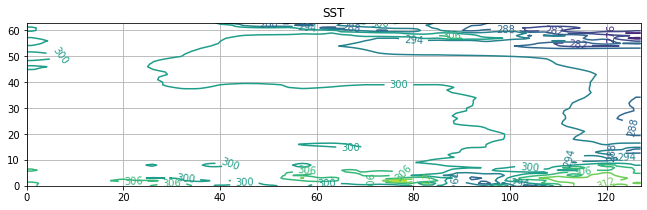

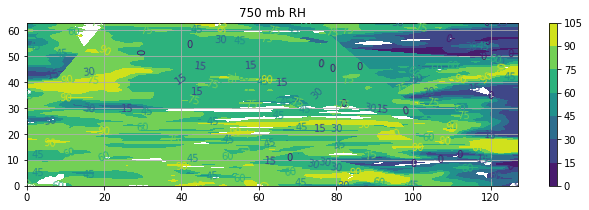

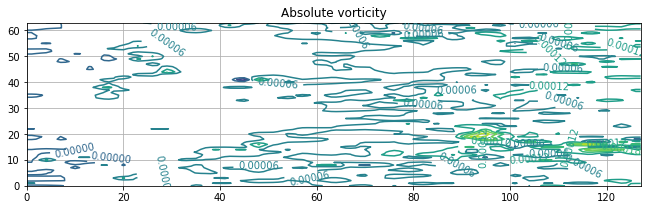

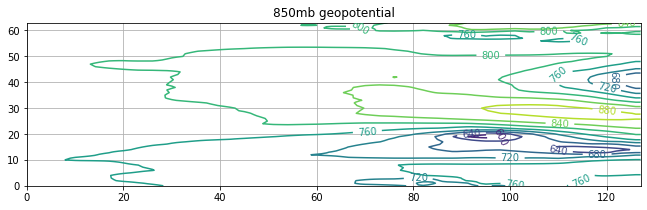

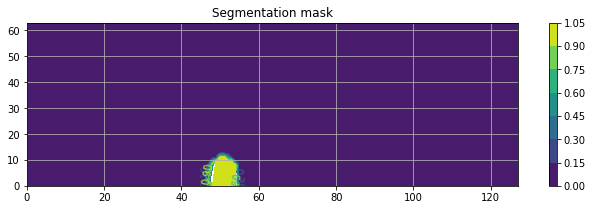

In [44]:
#
# visualize a few variables for checking the input data
#
check_visualization = "yes"
if check_visualization== "yes":
    print("Plotting one example from raw data input")
    temp = X[39]
    mask = Y[39]
    plt.figure(figsize=(11, 3)) 
    #plt.subplot(3,1,1)
    CS = plt.contour(temp[:,:,4])
    plt.clabel(CS, inline=True, fontsize=10)
    plt.title('SST')
    plt.grid()

    #plt.subplot(3,1,2)
    plt.figure(figsize=(11, 3))
    CS = plt.contourf(temp[:,:,1])
    plt.clabel(CS, inline=True, fontsize=10)
    plt.colorbar()
    plt.title('750 mb RH')
    plt.grid()
    
    plt.figure(figsize=(11, 3)) 
    #plt.subplot(3,1,1)
    CS = plt.contour(temp[:,:,0])
    plt.clabel(CS, inline=True, fontsize=10)
    plt.title('Absolute vorticity')
    plt.grid()

    plt.figure(figsize=(11, 3)) 
    #plt.subplot(3,1,1)
    CS = plt.contour(temp[:,:,9])
    plt.clabel(CS, inline=True, fontsize=10)
    plt.title('850mb geopotential')
    plt.grid()
    
    #plt.subplot(3,1,3)
    plt.figure(figsize=(11, 3))
    CS = plt.contourf(mask[:,:,0])
    plt.clabel(CS, inline=True, fontsize=10)
    plt.colorbar()
    plt.title('Segmentation mask')
    plt.grid()

    plt.show()